<a href="https://colab.research.google.com/github/Benjamin1118/Benjamin1118.github.io/blob/master/Project_1_HAM_Radio_Repeaters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Attempting to get data sets from https://www.repeaterbook.com/repeaters/index.php?state_id=49
This is the Utah data set for HAM Radio repeaters


In [0]:
#importing libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4
import requests
import plotly.tools as tls

In [0]:
url= 'https://www.repeaterbook.com/repeaters/Display_SS.php?state_id=49&loc=%&call=%&use=%'
result = requests.get(url)

In [0]:
result

<Response [200]>

In [0]:
result.text

'\n<!DOCTYPE HTML>\n\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta http-equiv="content-type" content="text/html; charset=windows-1252">\n<meta name="msapplication-config" content="none" />\n<meta property="og:image" content="https://www.repeaterbook.com/images/logo_200.gif" />\n<script src="/cdn-cgi/apps/head/4bPaLfquUpHlPe7F-RsoGmdFoKI.js"></script><link rel="stylesheet" type="text/css" href="/repeater_includes/css/global.css">\n<link rel="stylesheet" type="text/css" href="/repeater_includes/css/HeaderMenu.css">\n<link rel="stylesheet" type="text/css" href="/repeater_includes/css/w3.css">\n<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>\n<script type="text/javascript" src="/repeater_includes/js/marquee.js" async></script>\n\n<script src="/repeater_includes/js/modernizr.custom.01649.js" async></script>\n\n<script type="text/javascript">!function(t,o,e){e=t.createElement(o),t=t.getElementsByTagName(o)[0],e

In [0]:
soup=bs4.BeautifulSoup(result.text, 'html.parser')

soup

body= soup.find('table', {'class': 'w3-table sortable w3-responsive w3-striped'})

children = body.findChildren('tr', recursive=False)

dic = {'freq': [], 'offset': [], 'tone_up_down':[], 'location': [],'county':[], 'call': [], 'use':[]}

for i in range(len(children)):
  if i >0:
    dic['freq'].append(children[i].findAll('td')[0].getText().strip())
    dic['offset'].append(children[i].findAll('td')[1].getText().strip())
    dic['tone_up_down'].append(children[i].findAll('td')[2].getText().strip())
    dic['location'].append(children[i].findAll('td')[3].getText().strip())
    dic['county'].append(children[i].findAll('td')[4].getText().strip())
    dic['call'].append(children[i].findAll('td')[5].getText().strip())
    dic['use'].append(children[i].findAll('td')[6].getText().strip())

df = pd.DataFrame.from_dict(dic)
df.shape
df.head()

,freq,offset,tone_up_down,location,county,call,use
0,53.0100,-1 MHz,141.3 / 141.3,"Farmington, Shepard Peak",Davis,K7DAV,OPEN
1,53.1500,-1.0 MHz,146.2,"Salt Lake City, Farnsworth Peak",Salt Lake,KI7DX,OPEN
2,145.1250,-0.6 MHz,DSTR,"Salt Lake City, Farnsworth Peak",Salt Lake,KF6RAL,OPEN
3,145.1500,-0.6 MHz,DSTR,Cedar City,Iron,WR7AAA,OPEN
4,145.1500,-0.6 MHz,DSTR,"Logan, WA7KMF QTH",Cache,AC7O,OPEN


In [0]:
df['freq'] = df['freq'].astype(float)

In [0]:
df.shape


(340, 7)

In [0]:
df.dtypes

freq            float64
offset           object
tone_up_down     object
location         object
county           object
call             object
use              object
dtype: object

In [0]:
df.isnull().sum()

freq            0
offset          0
tone_up_down    0
location        0
county          0
call            0
use             0
dtype: int64

In [0]:
#Creating variable for my funciton to put results in
#band= [m_6, m_4, m_2, m_1_25, cm_70, cm_33, cm_23, cm_13]
m_6=[]
m_4=[]
m_2=[]
m_1_25=[]
cm_70=[]
cm_33=[]
cm_23=[]
cm_13=[]

In [0]:
#writing function for seperating freq to band width/
def freq_to_band (freq):
  if freq >=50 and freq <= 54:
    m_6.append(freq)
  elif freq >= 70 and freq <= 71:
    m_4.append(freq)
  elif freq >= 144 and freq <= 148:
    m_2.append(freq)
  elif freq >= 222 and freq <= 225:
   m_1_25.append(freq)
  elif freq >= 420 and freq <= 450:
    cm_70.append(freq)
  elif freq >= 902 and freq <= 928:
    cm_33.append(freq)
  elif freq >= 1240 and freq <= 1300:
    cm_23.append(freq)
  else:
    cm_13.append(freq)
 

In [0]:
#apply freq change
df.freq.apply(freq_to_band)

0      None
1      None
2      None
3      None
4      None
       ... 
335    None
336    None
337    None
338    None
339    None
Name: freq, Length: 340, dtype: object

In [0]:
print(len(cm_70))
print(len(m_2))

184
125


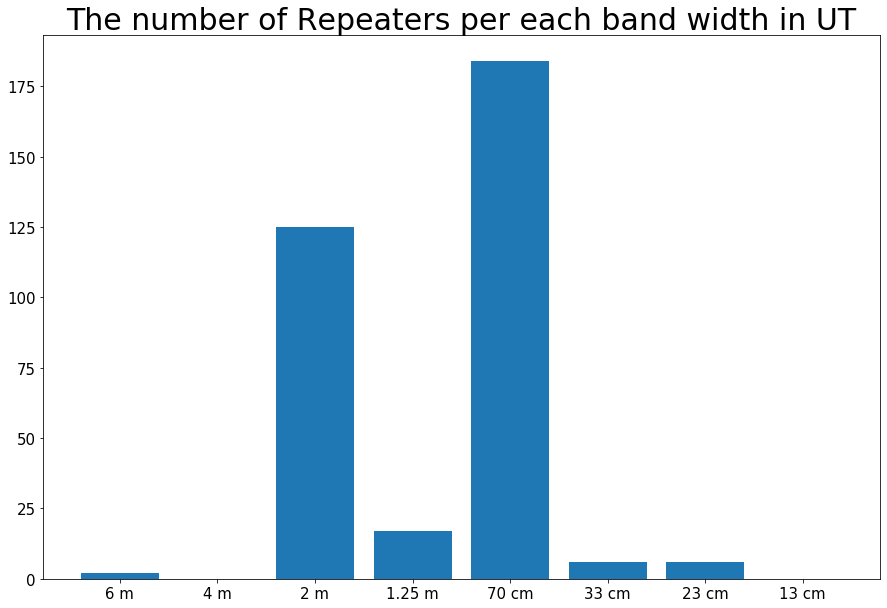

In [0]:
x= (np.arange(8))
y= ([len(m_6),len(m_4),len(m_2),len(m_1_25),len(cm_70),len(cm_33), len(cm_23), len(cm_13)])


fig, ax= plt.subplots(figsize = (15,10))
ax.tick_params(axis='both', which='major', labelsize=15)

plt.bar(x, y, tick_label=['6 m', '4 m', '2 m', '1.25 m', '70 cm', 
      '33 cm', '23 cm', '13 cm'])
plt.title('The number of Repeaters per each band width in UT', fontsize = 30)

plt.show()


In [0]:
df.head()

,freq,offset,tone_up_down,location,county,call,use
0,53.010,-1 MHz,141.3 / 141.3,"Farmington, Shepard Peak",Davis,K7DAV,OPEN
1,53.150,-1.0 MHz,146.2,"Salt Lake City, Farnsworth Peak",Salt Lake,KI7DX,OPEN
2,145.125,-0.6 MHz,DSTR,"Salt Lake City, Farnsworth Peak",Salt Lake,KF6RAL,OPEN
3,145.150,-0.6 MHz,DSTR,Cedar City,Iron,WR7AAA,OPEN
4,145.150,-0.6 MHz,DSTR,"Logan, WA7KMF QTH",Cache,AC7O,OPEN


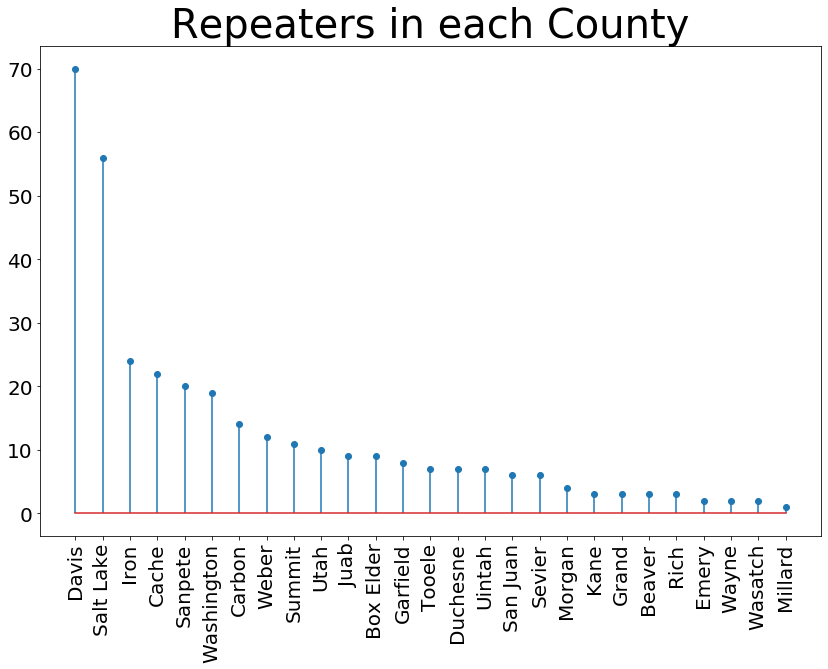

In [30]:
fig, ax= plt.subplots(figsize = (14,9))
plt.stem(df['county'].unique(),df['county'].value_counts(),use_line_collection=True);
plt.xticks(rotation=90,fontsize = 20);
plt.yticks(fontsize= 20);
plt.title('Repeaters in each County', fontsize=40);
#look up:
##x tick rotation
##x label rotation

In [0]:
##